In [81]:
### matplotlib 한글 폰트 깨짐 방지
### 이 셀 실행시키고 런타임->런타임 다시 시작 한 다음에
### 이 셀은 건너뛰고 아래부터 실행 시키면 됨.

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 0s (44.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 129504 files and dir

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Data
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

#warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/대학원/투빅스/week1/data.csv')

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# 결측치 확인

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

# 유니크한 값 1개인 컬럼 삭제

In [8]:
for i in ['EmployeeCount', 'Over18', 'StandardHours']:
  df.drop(columns = i, inplace=True)
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

# 숫자 -> 범주형

In [9]:
dict1 = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
dict2 = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
dict3 = {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}
dict4 = {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}

df.replace({'Education': dict1, 'EnvironmentSatisfaction': dict2, 
              'JobInvolvement': dict2, 'JobSatisfaction': dict2,
              'PerformanceRating': dict3, 'RelationshipSatisfaction': dict2, 
              'WorkLifeBalance': dict4
             }, inplace=True)

In [10]:
for i in df.columns:
  print(df[i])

0       41
1       49
2       37
3       33
4       27
        ..
1465    36
1466    39
1467    27
1468    49
1469    34
Name: Age, Length: 1470, dtype: int64
0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object
0           Travel_Rarely
1       Travel_Frequently
2           Travel_Rarely
3       Travel_Frequently
4           Travel_Rarely
              ...        
1465    Travel_Frequently
1466        Travel_Rarely
1467        Travel_Rarely
1468    Travel_Frequently
1469        Travel_Rarely
Name: BusinessTravel, Length: 1470, dtype: object
0       1102
1        279
2       1373
3       1392
4        591
        ... 
1465     884
1466     613
1467     155
1468    1023
1469     628
Name: DailyRate, Length: 1470, dtype: int64
0                        Sales
1       Research & Development
2       Research & Development
3       Research & Development
4       Research 

# 숫자형

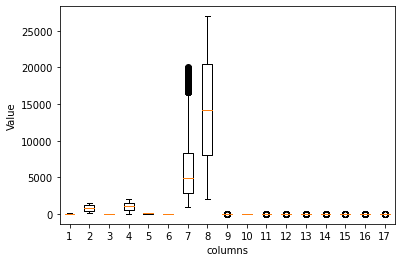

In [11]:

fig, ax = plt.subplots()
category = ['Attrition','BusinessTravel','Department','Education','EducationField','EnvironmentSatisfaction','Gender','JobInvolvement','JobRole','JobSatisfaction',
 'MaritalStatus','OverTime','PerformanceRating','RelationshipSatisfaction','WorkLifeBalance']
numerical = ['Age','DailyRate','DistanceFromHome','EmployeeNumber', 'HourlyRate','JobLevel','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
k=[]
for i in numerical:
  k.append(df[i])
#print(k)
ax.boxplot(k)
#ax.set_ylim(-10.0, 10.0)
ax.set_xlabel('columns')
ax.set_ylabel('Value')

plt.show()

# 일곱, 여덟번째 따로 빼서 봐야함

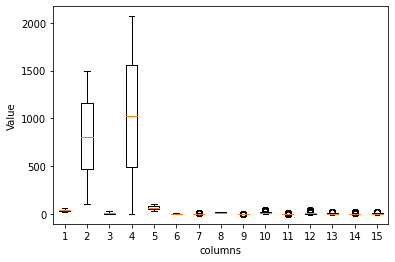

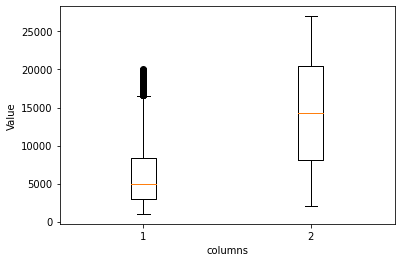

In [12]:
fig, ax = plt.subplots()
numerical1 = ['Age','DailyRate','DistanceFromHome','EmployeeNumber', 'HourlyRate','JobLevel','NumCompaniesWorked','PercentSalaryHike','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
numerical2 = ['MonthlyIncome','MonthlyRate']
k=[]
for i in numerical1:
  k.append(df[i])
#print(k)
ax.boxplot(k)
#ax.set_ylim(-10.0, 10.0)
ax.set_xlabel('columns')
ax.set_ylabel('Value')

plt.show()
fig, ax = plt.subplots()
k=[]
for i in numerical2:
  k.append(df[i])
#print(k)
ax.boxplot(k)
#ax.set_ylim(-10.0, 10.0)
ax.set_xlabel('columns')
ax.set_ylabel('Value')

plt.show()

Text(0.5, 0.98, 'Histogram')

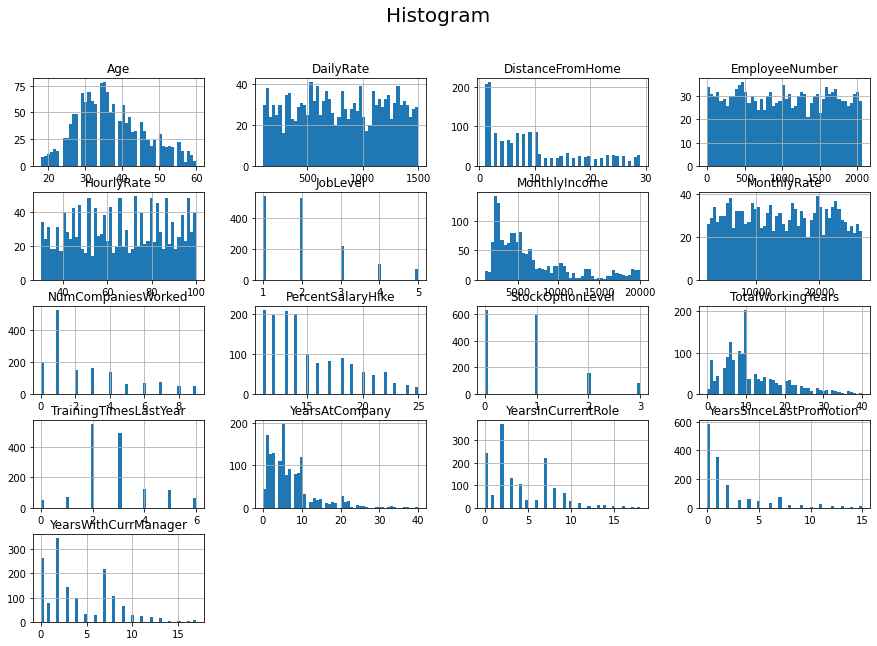

In [13]:
df[numerical].hist(bins=50, figsize=(15,10))
plt.suptitle("Histogram",fontsize=20)

# 범주형

In [26]:
print(len(category))
df[category]

15


,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,Yes,Travel_Rarely,Sales,College,Life Sciences,Medium,Female,High,Sales Executive,Very High,Single,Yes,Excellent,Low,Bad
1,No,Travel_Frequently,Research & Development,Below College,Life Sciences,High,Male,Medium,Research Scientist,Medium,Married,No,Outstanding,Very High,Better
2,Yes,Travel_Rarely,Research & Development,College,Other,Very High,Male,Medium,Laboratory Technician,High,Single,Yes,Excellent,Medium,Better
3,No,Travel_Frequently,Research & Development,Master,Life Sciences,Very High,Female,High,Research Scientist,High,Married,Yes,Excellent,High,Better
4,No,Travel_Rarely,Research & Development,Below College,Medical,Low,Male,High,Laboratory Technician,Medium,Married,No,Excellent,Very High,Better
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,College,Medical,High,Male,Very High,Laboratory Technician,Very High,Married,No,Excellent,High,Better
1466,No,Travel_Rarely,Research & Development,Below College,Medical,Very High,Male,Medium,Healthcare Representative,Low,Married,No,Excellent,Low,Better
1467,No,Travel_Rarely,Research & Development,Bachelor,Life Sciences,Medium,Male,Very High,Manufacturing Director,Medium,Married,Yes,Outstanding,Medium,Better
1468,No,Travel_Frequently,Sales,Bachelor,Medical,Very High,Male,Medium,Sales Executive,Medium,Married,No,Excellent,Very High,Good


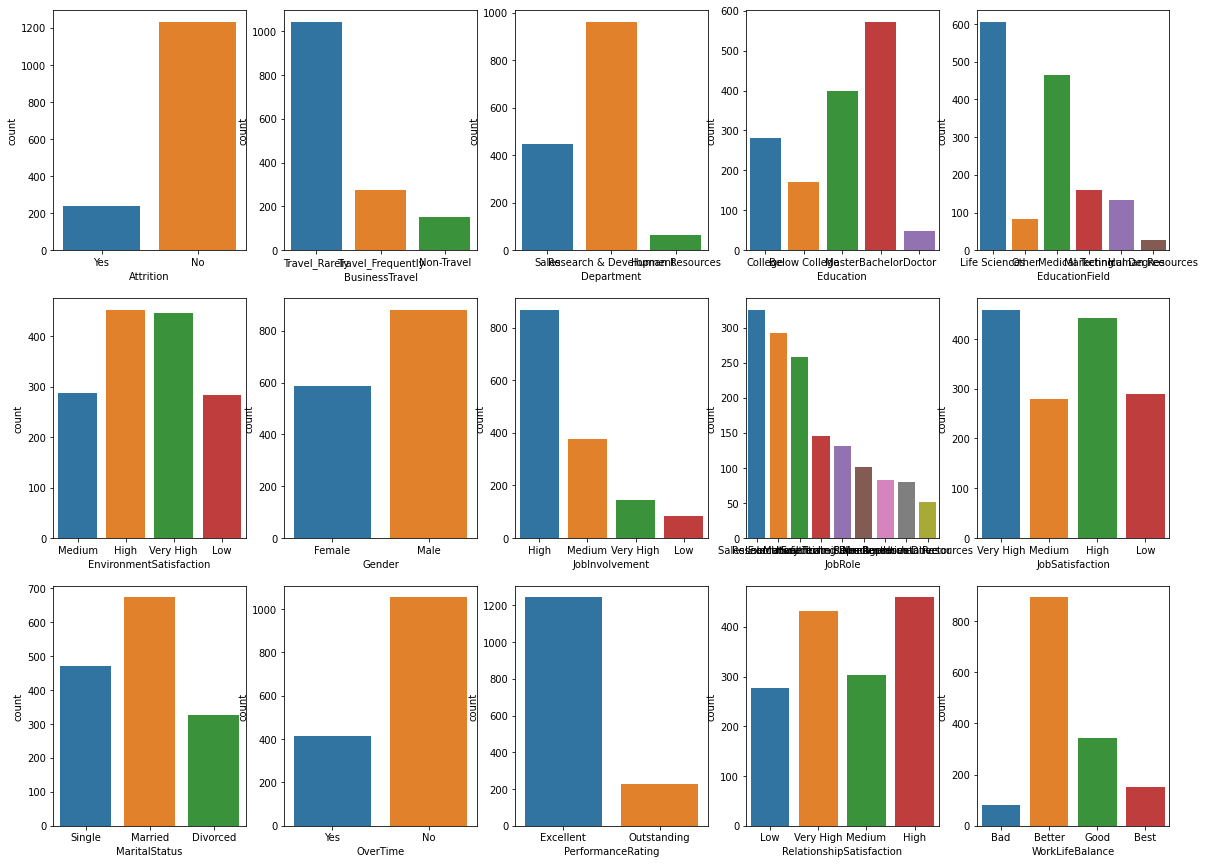

In [28]:
#for i,col in enumerate(df.columns[:-1]):
#    sns.distplot(df[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)])
col_n = 5
row_n = 3
fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))
for i, col in enumerate(category):
  sns.countplot(x=col, data=df, ax=ax[int(i/col_n),int(i%col_n)])
  #fig, ax = plt.subplots()
  #sns.countplot(x=i, data=df, figsize=(15,10))
  #plt.show()  


# 상관관계

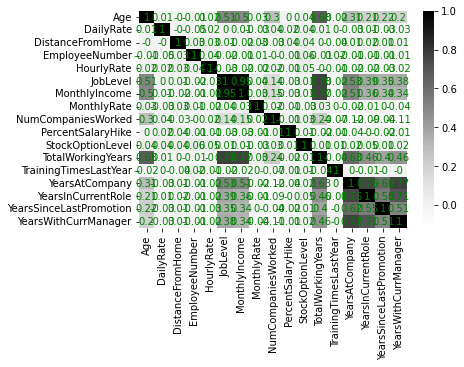

In [14]:
corr_df = df[numerical].corr()
corr_df = corr_df.apply(lambda x: round(x ,2))

ax = sns.heatmap(corr_df, annot=True, annot_kws=dict(color='g'), cmap='Greys')
plt.show()

In [15]:
s = corr_df.unstack()
df3 = pd.DataFrame(s[s < 1].sort_values(ascending=False), columns=['corr'])
df3.style.background_gradient(cmap='viridis')

,,corr
MonthlyIncome,JobLevel,0.950000
JobLevel,MonthlyIncome,0.950000
TotalWorkingYears,JobLevel,0.780000
JobLevel,TotalWorkingYears,0.780000
MonthlyIncome,TotalWorkingYears,0.770000
TotalWorkingYears,MonthlyIncome,0.770000
YearsAtCompany,YearsWithCurrManager,0.770000
YearsWithCurrManager,YearsAtCompany,0.770000
YearsAtCompany,YearsInCurrentRole,0.760000
YearsInCurrentRole,YearsAtCompany,0.760000
